In [3]:
from hpelm import ELM
import numpy as np
import time
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import os
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

In [ ]:
# from PIL import Image
# from numpy import array
# from scipy.misc import imresize

In [ ]:
# from os import listdir
# from os.path import isfile, join
# from cutImages import cut_image


# def read_images(path):
#     fullList = []
#     for c in range(1, 100):
#         mypath = path + str(c) + "/"
#         onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#         print (len(onlyfiles), c)
#         for x in onlyfiles:
#             if x == 'bb_info.txt':
#                 continue
#             img = cut_image(mypath + x)
#             arr = array(img)
#             arr = imresize(arr, [32, 32, 3])
#             r = arr[:, :, 0].flatten()
#             g = arr[:, :, 1].flatten()
#             b = arr[:, :, 2].flatten()
#             label = [c]
#             out = np.array(list(label) + list(r) + list(g) + list(b), np.int)
#             fullList.append(out)
#     shuffle(fullList)
#     imagesList = np.array(fullList, dtype=int)
#     print ("images shape: {}".format(imagesList.shape))
#     return imagesList

In [5]:
# imagesList = np.load('UECFOOD_100_1000Features_train.npy')
# trainingData = np.loadtxt('/media/aymen/DATA/datasets/cropped_db/UECFOOD100-Cropped/1664features-cnn-aug-crop-27epoch-food101.svm')
trainingData = np.loadtxt('/run/media/aymen/DATA/datasets/food101/images/15159883301664features-cnn-finetuned-food101.svm')
# trainingData = np.loadtxt(
#     '/media/aymen/DATA/datasets/food101/train/1664features-cnn-aug-nc-100epoch-finetuned-food101.svm')
# testingData = np.loadtxt(
#     '/media/aymen/DATA/datasets/food101/test/1664features-cnn-aug-nc-100epoch-finetuned-food101.svm')

In [6]:
# trainingData.shape, testingData.shape
trainingData.shape

(101000, 1665)

In [7]:
filterd = trainingData[((trainingData[:,0] > 0) & (trainingData[:,0] < 10))]

In [8]:
filterd.shape

(9000, 1665)

from cPickle import load
all_features_file = '/media/aymen/DATA/datasets/ghalib-features/data_features_orb_UECFOOD100.pickle'
all_features = load(open(all_features_file, 'rb'))

img_class = all_features[0][0].split('/')[-2]
print(img_class)

fet = all_features[0][1]
print fet.shape

count = 0 
for i, val in all_features:
    if count < 3 :
        img_class = i.split('/')[-2]
        print img_class, val
        count +=1
    else:
        break
        

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(trainingData[:,1:],trainingData[:,0])
# trainImagesList =np.column_stack([y_train, X_train])
# testImagesList =np.column_stack([y_test, X_test])
# # trainImagesList = np.loadtxt('train_yun')
# # testImagesList = np.loadtxt('test_yun')
# print ('trainImagesList', trainImagesList.shape)
# print ('testImagesList', testImagesList.shape)
# print (trainImagesList.shape[0] + testImagesList.shape[0])
# print(np.unique(trainImagesList[:,0]),np.unique(testImagesList[:,0]))

In [9]:
# np.savetxt('train_yun',trainImagesList)
# np.savetxt('test_yun',testImagesList)
trainImagesList[0,12]

NameError: name 'trainImagesList' is not defined

In [ ]:
# trainImagesList = np.loadtxt('train_yun')
# testImagesList = np.loadtxt('test_yun')

In [10]:
filterd

array([[6.      , 0.      , 0.      , ..., 0.528269, 0.678551, 1.455464],
       [2.      , 0.      , 0.      , ..., 1.40034 , 0.106055, 0.897541],
       [3.      , 0.      , 0.      , ..., 0.752622, 0.291786, 0.122191],
       ...,
       [9.      , 0.      , 0.      , ..., 1.062912, 1.444666, 0.629489],
       [9.      , 0.      , 0.      , ..., 2.774391, 0.552041, 0.551812],
       [5.      , 0.      , 0.      , ..., 1.032113, 1.020121, 0.256838]])

In [11]:
# imagesList = shuffle(filterd)
imagesList = filterd
# index = np.argwhere(imagesList== 175.0)
# imagesList = np.delete(imagesList, index,axis=0)
precentage = 0.75
print ('imaglist full', imagesList.shape)
trainImagesList = imagesList[0:int(imagesList.__len__() * precentage), :]
testImagesList = imagesList[int(imagesList.__len__() * precentage):, :]
print ('trainImagesList', trainImagesList.shape)
print ('testImagesList', testImagesList.shape)
print (trainImagesList.shape[0] + testImagesList.shape[0])
# print(imagesList[3])
print(np.unique(imagesList[:,0]))

imaglist full (9000, 1665)
trainImagesList (6750, 1665)
testImagesList (2250, 1665)
9000
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [58]:
# trainImagesList = trainingData
# testImagesList = testingData
# print(np.unique(trainImagesList[:,0]))
# print(np.unique(testImagesList[:,0]))

In [12]:
from collections import Counter
Counter(trainImagesList[:,0]),Counter(testImagesList[:,0])

(Counter({6.0: 760,
          2.0: 757,
          3.0: 741,
          5.0: 734,
          4.0: 731,
          7.0: 760,
          8.0: 769,
          1.0: 761,
          9.0: 737}),
 Counter({4.0: 269,
          7.0: 240,
          1.0: 239,
          6.0: 240,
          3.0: 259,
          5.0: 266,
          8.0: 231,
          9.0: 263,
          2.0: 243}))

In [60]:
# images_norm = imagesList[:,1:]
# labels = imagesList[:,0]
# from sklearn.preprocessing import normalize
# images_norm = normalize(images_norm)

# print (images_norm.shape)
# print('labels',labels.shape)
# print(images_norm[324])
# print(np.unique(images_norm))
# trainImagesList = images_norm[0:int(images_norm.__len__() * .8), :]
# testImagesList = images_norm[int(images_norm.__len__() * .8):, :]

# trainImagesList_labels = labels[0:int(labels.__len__() * .8)]
# testImagesList_labels = labels[int(labels.__len__() * .8):]

# print ('trainImagesList', trainImagesList.shape)
# print ('testImagesList', testImagesList.shape)
# print ('trainImagesList_labels', trainImagesList_labels.shape)
# print ('testImagesList_labels', testImagesList_labels.shape)
# # images = norm2


In [13]:
epoch = 1
batch_size = trainImagesList.__len__() / epoch
hidden_num = 1500
_inputs = 1664
_outputs = 10
elm = ELM(_inputs, _outputs, batch=batch_size)
elm.add_neurons(hidden_num, "tanh")
print("batch_size : {}".format(batch_size))
print("hidden_num : {}".format(hidden_num))


batch_size : 6750.0
hidden_num : 1500


In [14]:
k=1
old_batch_size_k = 0
start_time = time.time()
while k <= epoch:
    # shuffle(trainImagesList)
    print("batch : {}".format(k))
    # print (data.shape, data.dtype)
    # dynamic
#     train_x = np.array(data[old_batch_size_k:(batch_size * k), 1:], dtype="float")
#     train_y = np.array(data[old_batch_size_k:(batch_size * k), 0], dtype="int")
#     if k == epoch:
#         train_x = np.array(data[old_batch_size_k:, 1:], dtype="float")
#         train_y = np.array(data[old_batch_size_k:, 0], dtype="int")
#     old_batch_size_k = batch_size * k

#     # whole
#     train_x = np.array(data[:, 1:], dtype="float")
    train_y = np.array(trainImagesList[:, 0], dtype="int")
    #separate labels and images 
#     train_x = np.array(trainImagesList, dtype="float")
#     train_y = np.array(trainImagesList_labels, dtype="int")
    
#     print ("X", train_x.shape)
#     print ("Y", train_y.shape)
    # end whole
    train_y = np.eye(np.max(train_y) + 1)[train_y]
    elm.train(np.array(trainImagesList[:, 1:], dtype="float"), train_y)
    k += 1

end_time = time.time()
print("%s seconds" % (end_time - start_time))

batch : 1
0.8976356983184814 seconds


In [15]:
def predict(_testImagesList):
    # testImagesList = np.load(testPath)
    testList = _testImagesList

    # print ('testImagesList', testList, testList.shape)
    test_x = np.array(testList[:, 1:], dtype="float")
    test_y = np.array(testList[:, 0], dtype="int")
    test_y = np.eye(np.max(test_y) + 1)[test_y]
    #
    Y = elm.predict(test_x)
    predict = []
    for y in Y:
        predict.append(y.argmax())

    gt = []
    for y in test_y:
        gt.append(y.argmax())

    save = []
    for _ in np.arange(0, len(gt)):
        k = True if gt[_] == predict[_] else False
        save.append(k)

    return save,gt,predict

In [16]:
def predict_n(_testImagesList,n=5):
    # testImagesList = np.load(testPath)
    testList = _testImagesList

    # print ('testImagesList', testList, testList.shape)
    test_x = np.array(testList[:, 1:], dtype="float")
    test_y = np.array(testList[:, 0], dtype="int")
    test_y = np.eye(np.max(test_y) + 1)[test_y]
    #
    Y = elm.predict(test_x)
    predict = []
    for y in Y:
        predict.append(np.argsort(y)[-n:])

    gt = []
    for y in test_y:
        gt.append(y.argmax())

    save = []
    for _ in np.arange(0, len(gt)):
        k = True if gt[_] in predict[_] else False
        save.append(k)

    return save,gt,predict

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

In [22]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell),
    for label in labels: 
        print ("%{0}s".format(columnwidth) % label),
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1),
        for j in range(len(labels)): 
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell),
        print

In [43]:
# def predict_labels(_testImagesList,_labels):
#     # testImagesList = np.load(testPath)
#     testList = _testImagesList
#     labels = _labels

#     # print ('testImagesList', testList, testList.shape)
#     test_x = np.array(testList, dtype="float")
#     test_y = np.array(labels, dtype="int")
#     test_y = np.eye(np.max(test_y) + 1)[test_y]
#     #
#     Y = elm.predict(test_x)
#     predict = []
#     for y in Y:
#         predict.append(y.argmax())

#     gt = []
#     for y in test_y:
#         gt.append(y.argmax())

#     save = []
#     for _ in np.arange(0, len(gt)):
#         k = True if gt[_] == predict[_] else False
#         save.append(k)

#     return save

In [32]:
test,gt,prd = predict(testImagesList)
print("test accuracy: {0}".format(np.mean(test)))
train,tgt,tprd = predict(trainImagesList)
print("train accuracy: {0}".format(np.mean(train)))

test accuracy: 0.9871111111111112
train accuracy: 0.9983703703703704


In [24]:
test,gt,prd = predict_n(testImagesList,5)
print("test accuracy: {0}".format(np.mean(test)))
train,tgt,tprd = predict_n(trainImagesList,5)
print("train accuracy: {0}".format(np.mean(train)))

test accuracy: 0.9995555555555555
train accuracy: 1.0


In [36]:
def plot_confusion_matrix_pretty(cm, genre_list, name='food', title='Confusion matrix'):
    """
        Plots confusion matrices.
    """
    pylab.clf()
    pylab.matshow(cm, fignum=False, cmap='Blues', vmin=0, vmax=1.0)
    ax = pylab.axes()
    ax.set_xticks(range(len(genre_list)))
    ax.set_xticklabels(genre_list)
    ax.xaxis.set_ticks_position("bottom")
    ax.set_yticks(range(len(genre_list)))
    ax.set_yticklabels(genre_list)
    pylab.title(title)
    pylab.colorbar()
    pylab.grid(False)
    pylab.xlabel('Predicted class', fontsize = 5)
    pylab.ylabel('True class', fontsize = 5)
    pylab.grid(False)
    #pylab.show()
    pylab.savefig("confusion_matrix_%s.png" % name, bbox_inches="tight",dpi = 300)

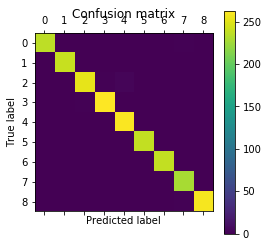

In [33]:

cnf_matrix = confusion_matrix(gt, prd, labels=np.unique(trainImagesList[:,0]))
# Plot non-normalized confusion matrix
plt.matshow(cnf_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('cnf_matrix.png',dpi = 500)

plt.show()


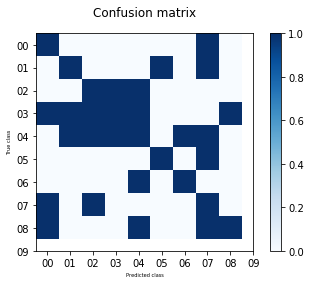

In [35]:
lis = range(10)
labels = ["{:02d}".format(x) for x in lis]
plot_confusion_matrix_pretty(cnf_matrix, labels)

In [31]:
accuracy_score(gt,prd)

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets

Results : 

food101

test accuracy: 0.939603960396

train accuracy: 0.953267326733

UECFOOD256-Cropped

test accuracy: 0.632087492037

train accuracy: 0.930099208155

UECFOOD256

test accuracy: 0.558551863255

train accuracy: 0.89010738988


UECFOOD100

test accuracy: 0.74791086351

train accuracy: 0.984378109453

===========================

Aug 27 epoch - aug with crops 

UECFOOD100 - top5 

test accuracy: 0.918871866295

train accuracy: 1.0


UECFOOD100 - top1 

test accuracy: 0.750227066303

train accuracy: 0.983536861149

In [ ]:
# test = predict_labels(testImagesList,testImagesList_labels)
# print("test accuracy: {0}".format(np.mean(test)))
# train = predict_labels(trainImagesList,trainImagesList_labels)
# print("train accuracy: {0}".format(np.mean(train)))
# test accuracy: 0.90003960396
# train accuracy: 0.92598019802

test accuracy: 0.867333333333
train accuracy: 0.992444444444

In [ ]:
p = elm.predict(np.array(testImagesList[:, 1:], dtype="float"))

In [ ]:
arg_sort = lambda x:  np.argsort(x)[::-1]

In [ ]:
z.shape

In [ ]:
topk = 5
z = arg_sort(p)
# print(testImagesList[0, 0], z[0,:topk])
tru = 0
fal = 0
for i in range(len(testImagesList)):
    if testImagesList[i, 0] in z[i,:topk]:
        print(testImagesList[i, 0] , z[i,:topk])
        tru += 1
    else:
        fal += 1
float(tru/fal)
print(tru, fal)